In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

(CVXPY) Nov 30 02:34:42 AM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: 找不到指定的模块。')


C:\Users\Terry_Xu\AppData\Local\Temp\ipykernel_28480\1659410565.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Data load

In [113]:
#df_ori = pd.read_csv('./data/adjclose_10.csv', sep=',')
# df_ori['cash'] = 1
# df_ori = pd.read_csv('./data/adjclose_100.csv', sep=',')
#df_ori = pd.read_csv('./data/adjclose_200.csv', sep=',')
df_ori = pd.read_csv('./data/adjclose_390.csv', sep=',')
df_ori.head()

,Date,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
0,2003-12-01,17.187073,0.328628,12.641930,4.173333,18.253553,21.010981,31.728964,9.004885,19.435568,...,55.406326,11.142131,13.518684,7.796231,18.915049,20.056917,8.857178,59.633968,42.333332,43.430244
1,2003-12-02,16.895355,0.326054,12.717795,4.264444,18.476866,20.571695,31.486847,9.113222,19.485489,...,55.840343,11.202512,13.562481,7.870525,18.972227,20.026297,8.824398,59.510849,42.000000,43.395306
2,2003-12-03,17.199224,0.318334,12.723416,4.258889,18.714577,20.796331,31.091831,9.196077,19.195930,...,55.089149,11.276100,14.235952,7.898383,18.993019,20.074398,8.804234,59.370113,41.919998,43.255459
3,2003-12-04,17.010830,0.320151,12.743081,4.233333,18.440844,20.791340,30.932554,9.336278,19.400621,...,55.105850,11.202512,14.153823,7.921604,19.242512,19.916992,8.768930,58.182713,41.986668,43.206528
4,2003-12-05,16.360535,0.315609,12.633492,4.244444,18.246349,19.418562,30.046940,9.304410,19.400621,...,54.838722,11.028918,14.022417,7.847307,19.117762,19.632778,8.549583,57.857265,41.060001,42.787037


In [114]:
df_ori.set_index('Date', inplace=True)
df_ori = df_ori.dropna(axis=1)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-22,123.989998,191.309998,102.699997,85.949997,333.130005,619.719971,182.669998,74.330002,231.149994,202.660004,...,244.470001,31.990000,87.529999,60.430000,104.010002,31.360001,128.332977,113.830002,225.860001,34.410000
2023-11-24,126.620003,189.970001,102.870003,86.599998,334.040009,619.429993,183.050003,74.300003,230.660004,203.419998,...,244.279999,31.940001,88.309998,60.520000,104.570000,31.320000,127.904991,113.430000,228.919998,34.349998
2023-11-27,125.010002,189.789993,102.709999,87.000000,332.429993,619.270020,183.770004,73.190002,229.160004,202.259995,...,245.039993,31.620001,87.059998,60.450001,103.959999,31.480000,127.690002,113.839996,231.500000,34.400002
2023-11-28,124.709999,190.399994,102.059998,84.449997,332.559998,623.320007,183.199997,74.050003,228.990005,207.369995,...,241.669998,31.540001,84.940002,60.970001,103.900002,31.480000,126.389999,113.089996,233.889999,34.549999
2023-11-29,127.589996,189.369995,103.629997,82.379997,333.339996,617.390015,182.710007,73.190002,229.160004,213.850006,...,240.770004,31.700001,83.669998,60.000000,102.339996,31.330000,125.519997,113.919998,236.619995,35.439999


  0%|          | 0/390 [00:00<?, ?it/s]

100%|██████████| 390/390 [00:00<00:00, 900.21it/s]


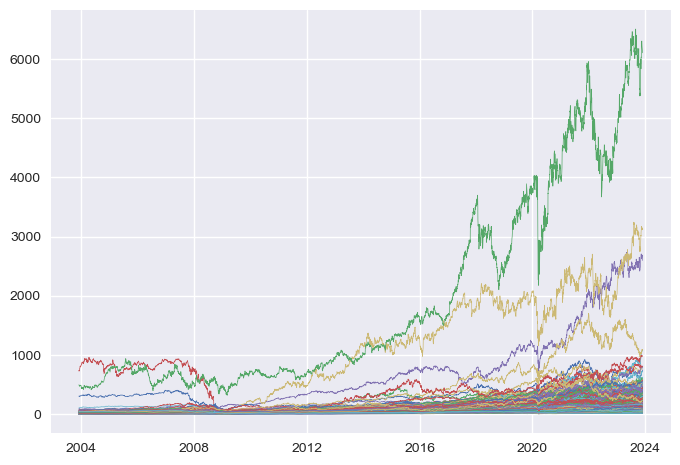

In [115]:
plt.figure()
for stk in tqdm(df_ori.columns):
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5)#, label=stk)
    # plt.legend(loc='best')
# plt.plot(df_ori.index, df_ori.iloc[:,232], linewidth=0.5, label='MNST')
plt.show()

In [116]:

df = df_ori.pct_change().iloc[1:,:]
df['cash']=(1.1)**(1/252)-1
df.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.021832,0.012234,-0.020907,-0.007631,0.012031,0.002569,0.019313,...,0.005419,0.003240,0.009529,0.003023,-0.001527,-0.003701,-0.002065,-0.007874,-0.000804,0.000378
2003-12-03,0.017985,-0.023676,0.000442,-0.001303,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,...,0.006569,0.049657,0.003540,0.001096,0.002402,-0.002285,-0.002365,-0.001905,-0.003223,0.000378
2003-12-04,-0.010954,0.005706,0.001546,-0.006001,-0.014627,-0.000240,-0.005123,0.015246,0.010663,-0.002902,...,-0.006526,-0.005769,0.002940,0.013136,-0.007841,-0.004010,-0.020000,0.001590,-0.001131,0.000378
2003-12-05,-0.038228,-0.014187,-0.008600,0.002625,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,...,-0.015496,-0.009284,-0.009379,-0.006483,-0.014270,-0.025014,-0.005594,-0.022070,-0.009709,0.000378
2003-12-08,0.020060,0.009594,0.007785,0.022513,-0.011054,0.013625,-0.011874,0.015753,-0.004374,-0.001275,...,0.031138,-0.003124,0.013018,0.016858,0.013140,0.029785,0.017179,0.040753,0.011601,0.000378


In [117]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [118]:
df.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.021832,0.012234,-0.020907,-0.007631,0.012031,0.002569,0.019313,...,0.005419,0.003240,0.009529,0.003023,-0.001527,-0.003701,-0.002065,-0.007874,-0.000804,0.000378
2003-12-03,0.017985,-0.023676,0.000442,-0.001303,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,...,0.006569,0.049657,0.003540,0.001096,0.002402,-0.002285,-0.002365,-0.001905,-0.003223,0.000378
2003-12-04,-0.010954,0.005706,0.001546,-0.006001,-0.014627,-0.000240,-0.005123,0.015246,0.010663,-0.002902,...,-0.006526,-0.005769,0.002940,0.013136,-0.007841,-0.004010,-0.020000,0.001590,-0.001131,0.000378
2003-12-05,-0.038228,-0.014187,-0.008600,0.002625,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,...,-0.015496,-0.009284,-0.009379,-0.006483,-0.014270,-0.025014,-0.005594,-0.022070,-0.009709,0.000378
2003-12-08,0.020060,0.009594,0.007785,0.022513,-0.011054,0.013625,-0.011874,0.015753,-0.004374,-0.001275,...,0.031138,-0.003124,0.013018,0.016858,0.013140,0.029785,0.017179,0.040753,0.011601,0.000378


### equally weighted

In [134]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    # print(cur_stg)

    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(cur_stg, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)

    return arr_pfl

arr_equal = equally_weighted(df)

In [28]:
test_df=pd.DataFrame({'A':[2,0.5,2,0.5],"B":[0.5,2,0.5,2],"C":[1,2,3,4]})
test_df

,A,B,C
0,2.0,0.5,1
1,0.5,2.0,2
2,2.0,0.5,3
3,0.5,2.0,4


### BCRP

In [29]:
#Best constant rebalanced portfolio in hindsight
def BCRP(df):
    x=cp.Variable(len(df.columns),nonneg=True)
    objective=cp.Maximize(cp.sum(cp.log(1+df.values@x)))
    constrains=[cp.sum(x)<=1]
    problem=cp.Problem(objective,constrains)
    result=problem.solve(solver=cp.ECOS)
    weight=x.value
    arr_pfl = [1]
    cur_pfl = 1
    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(weight, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)
    return weight,arr_pfl
weight_BCRP,arr_BCRP=BCRP(df)
weight_BCRP

array([0.00000000e+00, 2.58230998e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.24461562e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

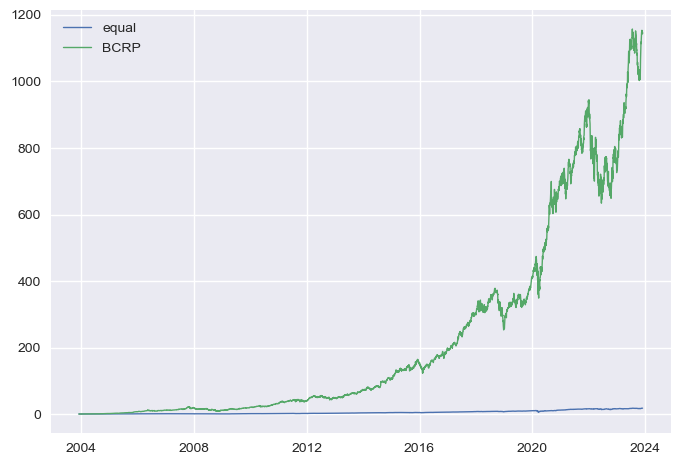

In [30]:

plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.plot(df.index,arr_BCRP[:-1], linewidth=1, label='BCRP')
plt.legend(loc='best')
plt.show()

### loss function

In [121]:
df_num=df.values

In [122]:
def minstrategy_regret(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return objective.value
xmin=minstrategy_regret(df_num[0:10])
xmin
    
    

-0.24573873713359606

In [109]:
def minstrategy_regret_x(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return x.value
xmin=minstrategy_regret_x(df_num)

array([9.99999992e-01, 3.39331484e-11, 6.77646833e-11, 1.05579227e-10,
       2.52676175e-11, 4.61712090e-11, 3.45213029e-11, 2.92154706e-11,
       2.69182029e-11, 8.31099097e-11, 1.95696941e-10, 6.96898898e-11,
       2.46107619e-11, 3.52326560e-11, 6.63111364e-12, 3.42572214e-11,
       7.85558930e-10, 8.31379619e-11, 1.79857881e-11, 7.99222815e-12,
       0.00000000e+00, 4.28627544e-11, 3.77112221e-11, 5.95850490e-11,
       5.91451440e-11, 2.38768298e-11, 1.03139513e-10, 3.97787869e-11,
       8.45218910e-11, 1.46263387e-11, 2.26122056e-11, 3.32442137e-11,
       6.51015074e-11, 6.33896537e-11, 2.24905469e-11, 3.08874611e-11,
       5.83127219e-11, 5.89248277e-11, 1.36461708e-10, 5.50715791e-11,
       5.16933379e-11, 6.07248596e-12, 5.13397368e-11, 2.12422484e-11,
       5.20912884e-11, 4.23127500e-11, 1.53698767e-11, 1.14328536e-11,
       9.26366602e-11, 8.76299837e-10, 2.38289866e-11, 3.14965820e-11,
       6.43220694e-11, 2.04277072e-11, 6.16746732e-11, 5.88553761e-11,
      

In [128]:
minstrategy_re=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_regret(df_num[:i+1,:])
    minstrategy_re.append(x)
minstrategy_re
    

100%|██████████| 5033/5033 [09:56<00:00,  8.43it/s]


[-0.0685291243127552,
 -0.10549955127086051,
 -0.0890954437122215,
 -0.17127942913871652,
 -0.17618660058012028,
 -0.20920194700331213,
 -0.21460006581595556,
 -0.25547588803958066,
 -0.26639794162694885,
 -0.24573873713359606,
 -0.2483445993718996,
 -0.2352468480935555,
 -0.26958775025260806,
 -0.2740364800460529,
 -0.30278840336427004,
 -0.3319343369371267,
 -0.32231310541056374,
 -0.33013746507290814,
 -0.342056489491967,
 -0.3349221583228585,
 -0.32532976813297493,
 -0.3373058910372079,
 -0.3325326165754559,
 -0.35850813520839475,
 -0.3637391935255439,
 -0.4149192049668483,
 -0.3866628118098994,
 -0.397930579624602,
 -0.41695939179218056,
 -0.4016040677772002,
 -0.39737018574280397,
 -0.4570572904785435,
 -0.47230938348169793,
 -0.4466455862970487,
 -0.43133692286921194,
 -0.424351891956752,
 -0.49474068311424096,
 -0.4876604560625228,
 -0.46251515161451795,
 -0.45874990164135354,
 -0.4863880431686874,
 -0.49748485644699897,
 -0.43790113616816,
 -0.39645370989240036,
 -0.3982269947

$$
\text{Regret}=\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle-\min_{x \in X}\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle
$$

### OGD

In [129]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    # objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    objective = cp.Minimize(cp.norm(x_old-ETA*loss-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def OGD_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[1]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(df_num[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD,acu_regret_OGD,avg_regret_OGD= OGD_algo(df_num)

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [01:15<00:00, 66.75it/s]


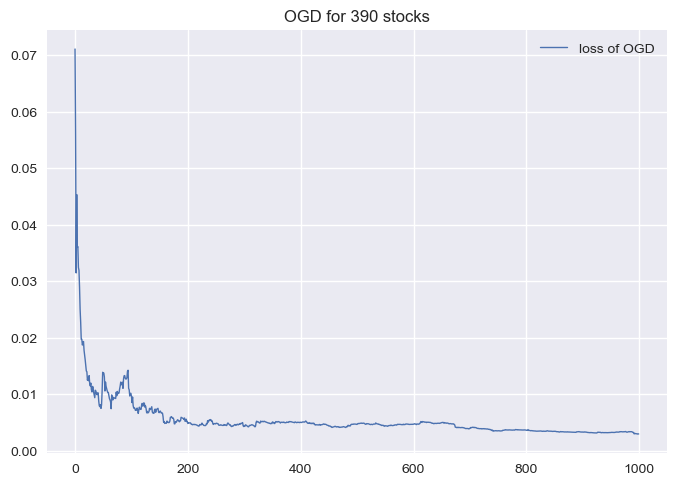

In [130]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.legend(loc='best')
plt.savefig('./result/OGD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

### OMD

In [149]:
# begin OMD process
# import math

def OMD_update(x_old, loss, num_of_var, A):
    x = cp.Variable(num_of_var, nonneg=True)
    #x = cp.Variable(num_of_var)
    objective = cp.Minimize(loss @ x + 0.5 * (x.T@A@x)-(x.T@A@x_old))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OMD_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[1]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(df_num[i,:]+1)
        # OMD to find strategy in the next round
        ETA=0.5
        a=ETA+cur_stg
        A=np.diag(a)
        last_stg = cur_stg.copy()
        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        cur_stg = OMD_update(cur_stg, direction, len(df.columns),A)
        arr_stg.append(cur_stg)
        

    return arr_pfl , arr_stg, ret, weight,avg_regret, acu_regret


arr_pfl_OMD , arr_stg_OMD , ret_OMD, weight_OMD,avg_regret_OMD,acu_regret_OMD= OMD_algo(df)

100%|██████████| 5033/5033 [02:22<00:00, 35.26it/s]


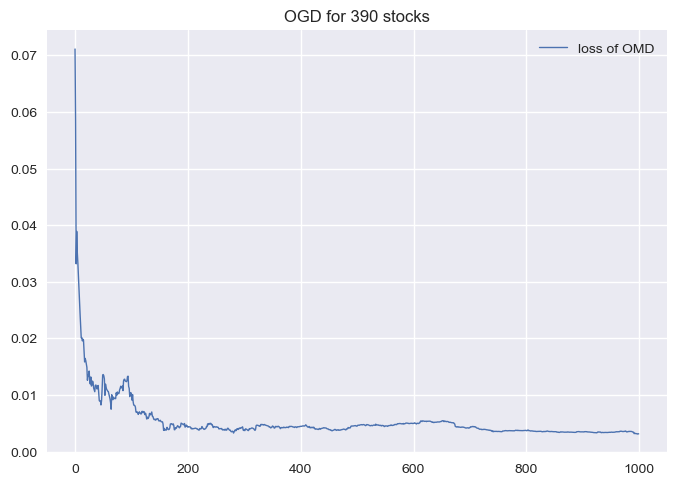

In [147]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
plt.savefig('./result/OMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

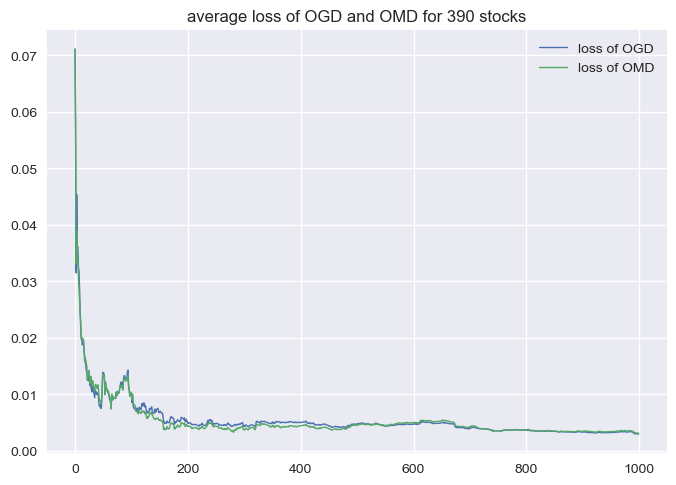

In [148]:
plt.figure()
plt.plot(avg_regret[:1000], linewidth=1, label='loss of OGD')
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
plt.savefig('./result/OGDandOMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('average loss of OGD and OMD for 390 stocks')
plt.show()

### up

In [15]:

# Donot use up, It need lots of time 
# df_num=df.values
# df_num=(1+df_num)
# df_num
# import itertools
# #universal portfolio(up)
# def binnings(n, k, cache={}):
#     if n == 0:
#         return np.zeros((1, k))
#     if k == 0:
#         return np.empty((0, 0))
#     args = (n, k)
#     if args in cache:
#         return cache[args]
#     a = binnings(n - 1, k, cache)
#     a1 = a + (np.arange(k) == 0)
#     b = binnings(n, k - 1, cache)
#     b1 = np.hstack((np.zeros((b.shape[0], 1)), b))
#     result = np.vstack((a1, b1))
#     cache[args] = result
#     return result

# def portfolio_wealth(b, stock_data):
#     return np.prod(np.dot(stock_data,b))

# def up_algo(df):
#     arr_pfl = [1]
#     cur_pfl = 1
#     cur_stg = np.array([1/len(df.columns)] * len(df.columns))
#     last_stg = np.array([1/len(df.columns)] * len(df.columns))
#     arr_stg = [cur_stg]
#     COMMISSION = 1e-3
#     ret=[1]
#     weight=[sum(cur_stg)]
#     allocation_granularity = 20
#     all_portfolio_allocations = binnings(allocation_granularity, len(df.columns))
#     row_sums = all_portfolio_allocations.sum(axis=1)
#     all_portfolios = all_portfolio_allocations / row_sums[:,np.newaxis]
#     for i in tqdm(range(len(df))):
#         commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
#         current_ret=np.dot(cur_stg, df_num[i,:])- commision_rate
#         cur_pfl = cur_pfl * (current_ret- commision_rate)
#         ret.append(current_ret)
#         weight.append(np.sum(cur_stg))
#         arr_pfl.append(cur_pfl)
#         last_stg = cur_stg.copy()
#         #update
#         portfolio_weights = np.array([portfolio_wealth(x, df_num[:i,:]) for x in list(all_portfolios)])
#         weighted_portfolio = np.dot(portfolio_weights, all_portfolios)
#         cur_stg = weighted_portfolio / np.sum(portfolio_weights)

#         arr_stg.append(cur_stg)
#     return arr_pfl , arr_stg, ret, weight

        
# arr_pfl_up , arr_stg_up , ret_up, weight_up= up_algo(df)     

### buy and hold

In [16]:
#buy and hold
def buy_and_hold(df_ori):
    arr_pfl = [1]
    stg = np.array([1/len(df_ori.columns)] * len(df_ori.columns))
    units=stg/df_ori.iloc[1,:].values
    for i in range(2,len(df_ori)):
        cur_pfl=df_ori.iloc[i,:].values@units
        arr_pfl.append(cur_pfl)
    return arr_pfl

arr_pfl_BH=buy_and_hold(df_ori)
    


### EG algorithm

In [17]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EG_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[1]
    weight=[sum(cur_stg)]
    ETA=10

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EG , arr_stg_EG , ret_EG, weight_EG= EG_algo(df)  

100%|██████████| 5033/5033 [00:01<00:00, 3670.20it/s]


### RM algorithms

In [51]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RM_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[1]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RM , arr_stg_RM , ret_RM, weight_RM= RM_algo(df)  


100%|██████████| 5033/5033 [00:01<00:00, 2740.79it/s]


In [49]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUS_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[1]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUS, arr_stg_RMPLUS , ret_RMPLUS, weight_RMPLUS= RMPLUS_algo(df)  

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:01<00:00, 2914.50it/s]


### market cap strategy

In [132]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding=outstanding_df.values
market_cap=df_ori.values*outstanding
share=market_cap/np.sum(market_cap,axis=1)[:,np.newaxis]
ret=np.sum(df_num[:,:-1]*share[:-1,:],axis=1)
arr_pfl_MC=np.cumprod(1+ret)
arr_pfl_MC
    

100%|██████████| 390/390 [01:00<00:00,  6.48it/s]


array([0.99518595, 0.992587  , 0.99688332, ..., 6.25834955, 6.25908074,
       6.25518217])

### Graph

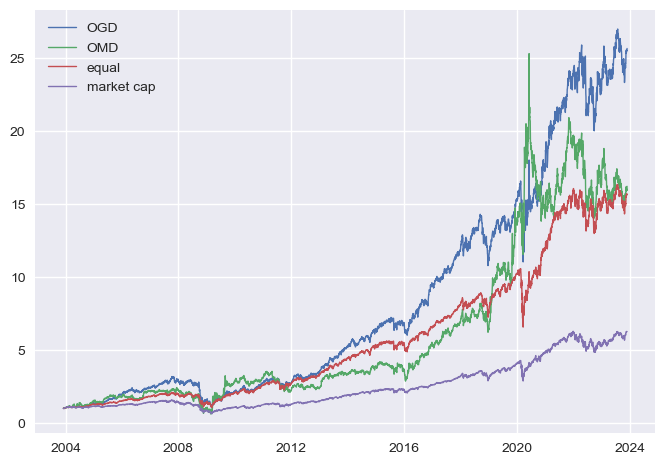

In [150]:
plt.figure()
plt.plot(df.index, arr_pfl_OGD[1:], linewidth=1, label='OGD')
plt.plot(df.index, arr_pfl_OMD[1:], linewidth=1, label='OMD')
# # plt.plot(df.index, arr_BCRP[1:], linewidth=1, label='BCRP')
plt.plot(df.index,arr_equal[1:], linewidth=1, label='equal')
# # #plt.plot(df.index, arr_pfl_up, linewidth=1, label='up')
# plt.plot(df.index, arr_pfl_BH, linewidth=1, label='buy and hold')
# plt.plot(df.index, arr_pfl_EG[1:], linewidth=1, label='EG')
# plt.plot(df.index,arr_pfl_RM[1:], linewidth=1, label='RM')
# plt.plot(df.index,arr_pfl_RMPLUS[1:], linewidth=1, label='RM+')
plt.plot(df.index,arr_pfl_MC, linewidth=1, label='market cap')
plt.legend(loc='best')
plt.savefig('./result/my_figure.png',bbox_inches='tight') 
plt.show()

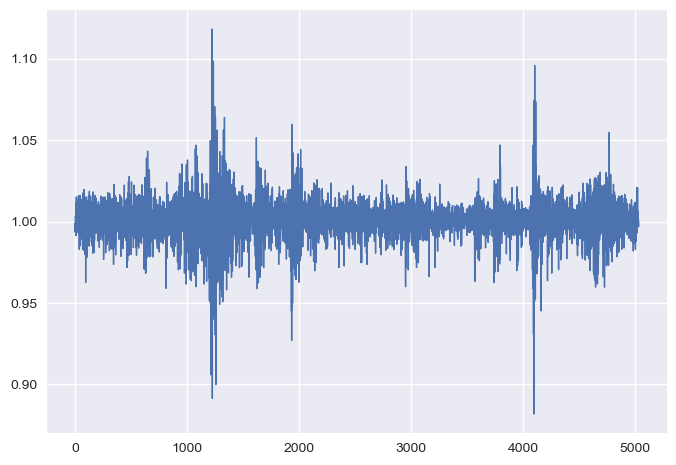

In [15]:
plt.figure()
plt.plot(ret_RM[1:], linewidth=1, label='OGD')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


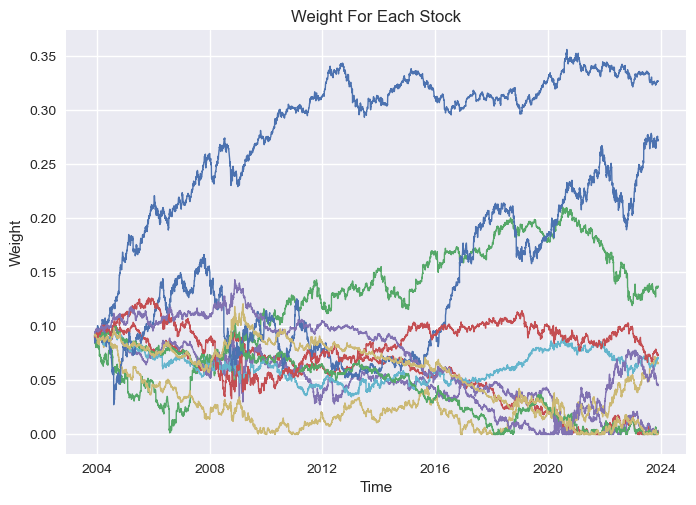

In [75]:
arr_stg = pd.DataFrame( arr_stg_OGD[1:], columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()

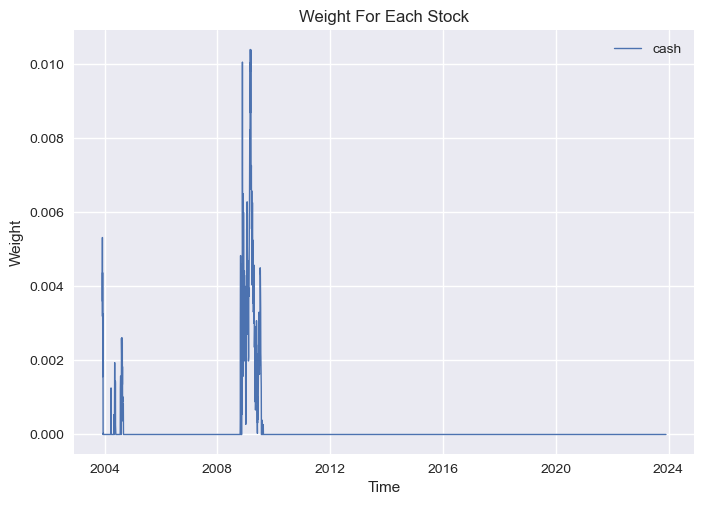

In [35]:
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()